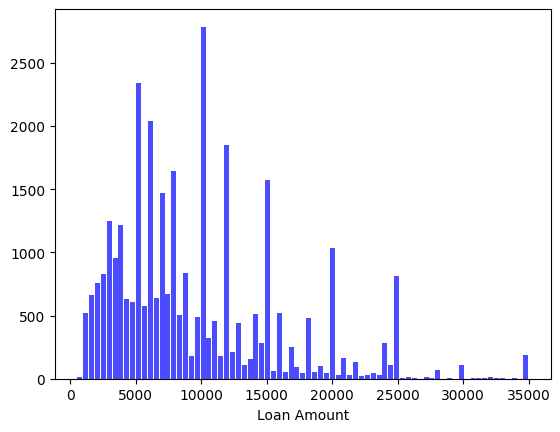

There are 32 000 rows of data so the scatter plot may take a little while to plot.


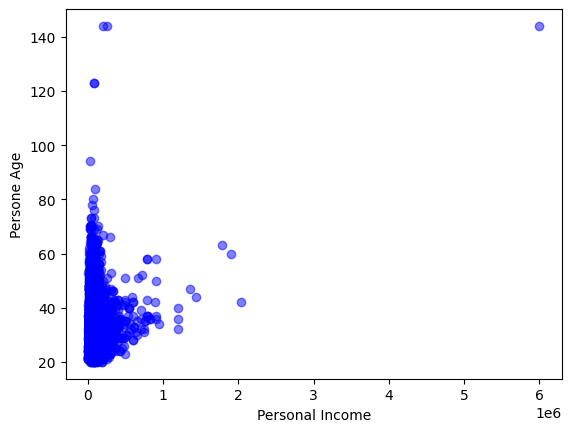

In [1]:
#The possibility that someone who has borrowed money will not repay it all
#The expected loss is the amount that the firm loses as a result of the default on a loan. 
#Expected loss is a simple calculation of the following three components. The probability of default, 
#which is the likelihood someone will default on a loan. The exposure at default which is the amount 
#outstanding at the time of default. And the loss given default which is the ratio of the exposure 
#against any recovery from the loss.
#The formula for expected loss is probability of default times exposure at default and loss given default.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

cr_loan = pd.read_csv("cr_loan2.csv")

# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581
loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                  

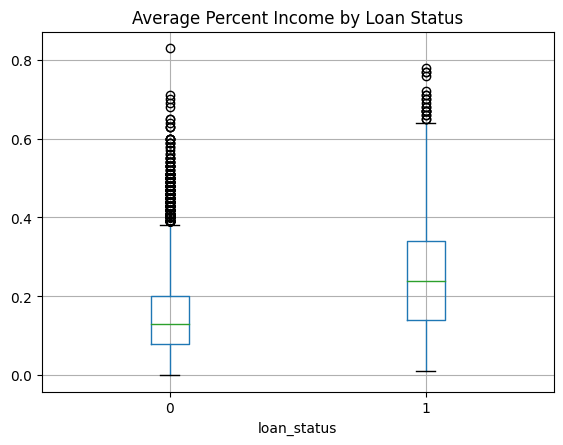

In [2]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

In [3]:
#Remove outliers
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
                  values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0
                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


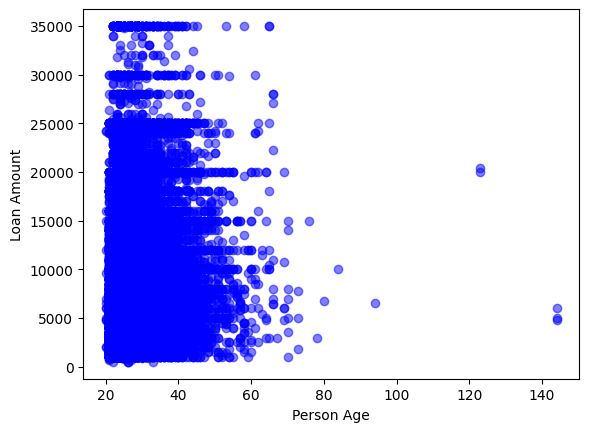

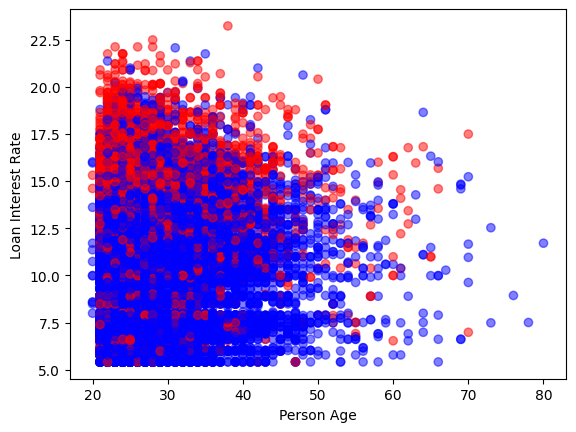

In [4]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()


# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 80].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(x  = cr_loan_new['person_age'], y = cr_loan_new['loan_int_rate'],
c = cr_loan_new['loan_status'],
cmap = matplotlib.colors.ListedColormap(colors),
alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

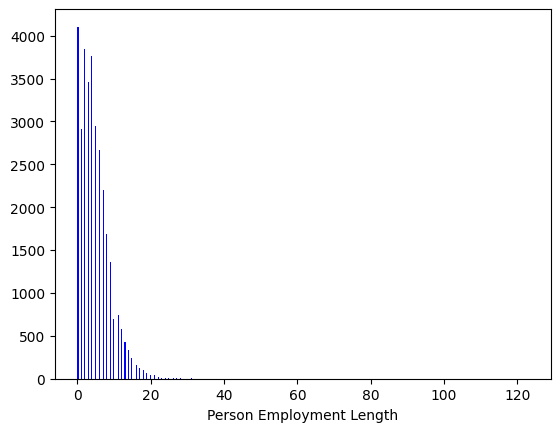

3116


In [5]:
#Missing value
#null_columns = cr_loan.columns[cr_loan.isnull().any()]
#cr_loan[null_columns].isnull().sum()

# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()


# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

In [6]:
cr_loan_clean

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

#The more positive the value, the more it predicts defaults. Look at the value for loan_int_rate.

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]
[-4.2253171]
[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


In [8]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')
   loan_status  prob_default
0            0      0.203595
1            0      0.137401
2            0      0.119622
3            0      0.307440
4            0      0.505785


In [9]:
#Model accuracy scoring 
from sklearn.metrics import classification_report
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
# Precision = truepositive/(truepositive + falsepositive) --> ability of the classifier not to 
# label a negative sample as positive
# Recall = tp / (tp+fn) ability of the classifier to find all the positive samples
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

#The recall for defaults is 0.22 meaning 22% of our true defaults were predicted correctly.

0    10861
1      925
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786



0.7995078907178008


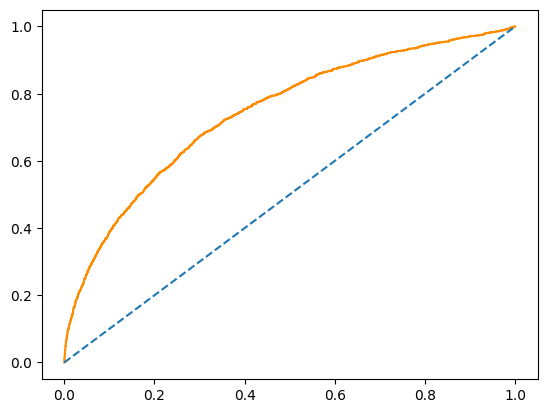

In [10]:
from sklearn import metrics
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X_test, y_test))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = metrics.roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = metrics.roc_auc_score(y_test, prob_default)

#So the accuracy for this model is about 80% and the AUC score is 76%. Notice that what the ROC chart shows us 
#is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).

In [11]:
#Confusion matrices
# TN True Negatives (Predicted = 0, Actual = 0), FP false positives (Predicted = 1, Actual = 0)
#FN False Negatives (Predicted = 0, Actual = 1), TP true positives (Predicted = 1,Actual = 1)

# Set the threshold for defaults to 0.5
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

# Print the confusion matrix
print(metrics.confusion_matrix(y_test,preds_df['loan_status']))

# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = metrics.precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

avg_loan_amnt = cr_loan_clean['loan_amnt'].mean()

# Calculate the estimated impact of the new default recall rate
print(avg_loan_amnt * num_defaults * (1 - default_recall))

[[8846  348]
 [2015  577]]
12206848.964421853


ValueError: x and y must have same first dimension, but have shapes (4375,) and (1,)

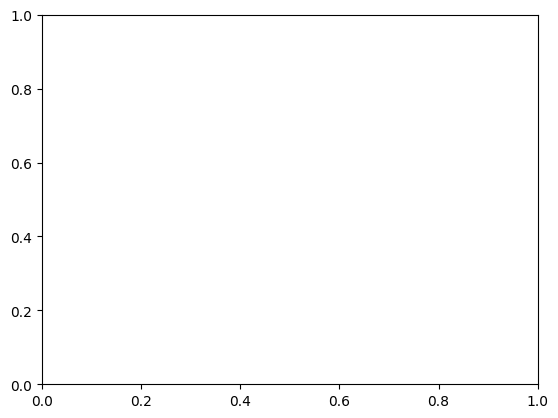

In [12]:
#Show which probability is better to select (0.4 in our case)
plt.plot(thresholds,default_recall)
plt.plot(thresholds,nondef_recalls)
plt.plot(thresholds,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()
#the intersection is the best

In [13]:
#Gradient Boost decision tree

# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1], columns = ['prob_default'])
true_df = y_test

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

       loan_status  prob_default
0                0      0.101143
1                0      0.369374
2                0      0.008102
3                0      0.111173
4                0      0.468178
...            ...           ...
11781            0      0.062198
11782            1      0.794906
11783            1      0.199179
11784            0      0.010228
11785            1      0.078198

[11786 rows x 2 columns]


In [14]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test,gbt_preds, target_names=target_names))

[0 0 0 ... 0 0 0]
              precision    recall  f1-score   support

 Non-Default       0.86      0.96      0.91      9194
     Default       0.74      0.45      0.56      2592

    accuracy                           0.84     11786
   macro avg       0.80      0.70      0.73     11786
weighted avg       0.83      0.84      0.83     11786



In [15]:
#Plot importances selezionare le colonne più importanti per il modello
# Create and train the model on the training data
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'person_income': 1299.0, 'loan_int_rate': 994.0, 'loan_percent_income': 585.0, 'loan_amnt': 533.0, 'person_home_ownership_MORTGAGE': 115.0, 'loan_grade_F': 17.0}


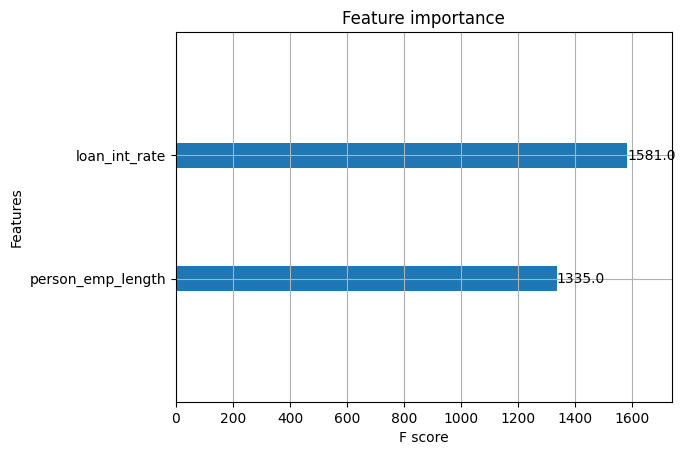

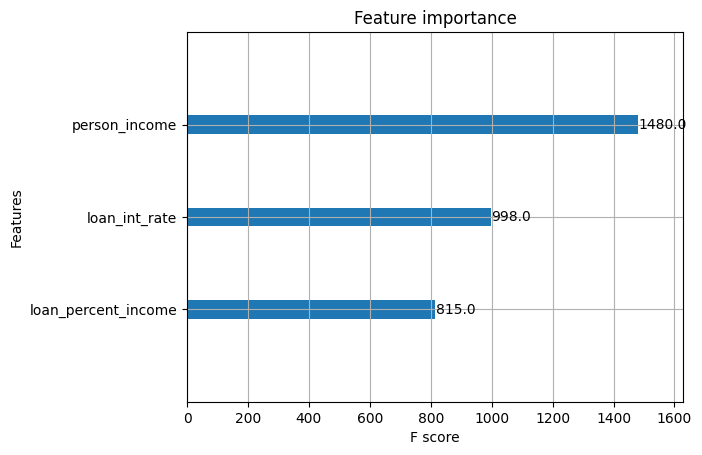

In [16]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
# Train a model on the X data with 2 columns
X2_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.4, random_state=123)
clf_gbt2 = xgb.XGBClassifier().fit(X2_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

X3_train, X_test, y_train, y_test = train_test_split(X3, y, test_size=.4, random_state=123)

# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3_train,np.ravel(y_train))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

#Most important column is the personal income

In [17]:
#CrossValidation.
params = {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}

# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10

# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)

# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)


   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.881806       0.001795       0.872215      0.008821
1        0.887735       0.001098       0.877671      0.008170
2        0.891360       0.002140       0.880851      0.007495
3        0.894470       0.001379       0.882568      0.007724
4        0.896968       0.001140       0.883956      0.007535


In [18]:

cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
            shuffle = True)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.881215       0.001403       0.872696      0.012551
1        0.887388       0.001580       0.877594      0.012738
2        0.891297       0.000954       0.881628      0.011674
3        0.893464       0.000768       0.882840      0.011189
4        0.896269       0.000838       0.883879      0.010970
0.9


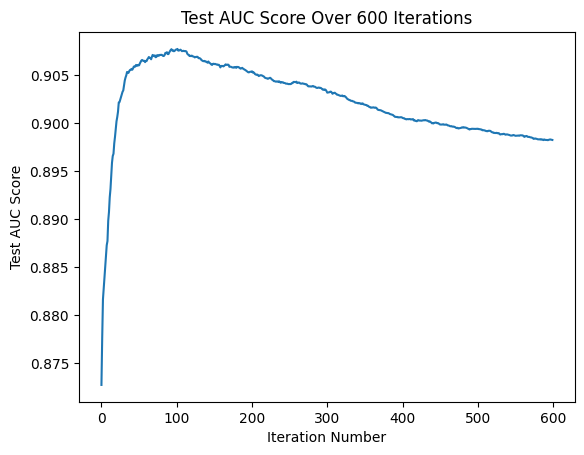

In [19]:
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']).round(2))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

# This is because this much cross-validation can actually cause the model to become overfit. 
#So, there is a limit to how much cross-validation you should to.

In [20]:
from sklearn.model_selection import cross_val_score
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 4)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.88642534 0.88122172 0.88393665 0.88979407]
Average accuracy: 0.89 (+/- 0.01)


In [21]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                       y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

# Create data sets for defaults and non-defaults
nondefaults = X_y_train [X_y_train ['loan_status'] == 0]
defaults = X_y_train [X_y_train ['loan_status'] == 1]

# Undersample the non-defaults
nondefaults = nondefaults.sample(count_default)

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

#Piece of cake! Now, our training set has an even number of defaults and non-defaults.

0    3872
1    3872
Name: loan_status, dtype: int64


In [22]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

preds_df_lr = clf_logistic.predict(X_test)

preds_df_gbt = clf_gbt.predict(X_test)

In [23]:
# Print the logistic regression classification report
from sklearn.metrics import precision_recall_fscore_support
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr, target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt, target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df_lr, average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test, preds_df_gbt, average = 'macro')[2])

              precision    recall  f1-score   support

 Non-Default       0.81      0.96      0.88      9194
     Default       0.62      0.22      0.33      2592

    accuracy                           0.80     11786
   macro avg       0.72      0.59      0.61     11786
weighted avg       0.77      0.80      0.76     11786

              precision    recall  f1-score   support

 Non-Default       0.86      0.96      0.91      9194
     Default       0.74      0.45      0.56      2592

    accuracy                           0.84     11786
   macro avg       0.80      0.70      0.73     11786
weighted avg       0.83      0.84      0.83     11786

0.6051472893670924
0.7336016242947945


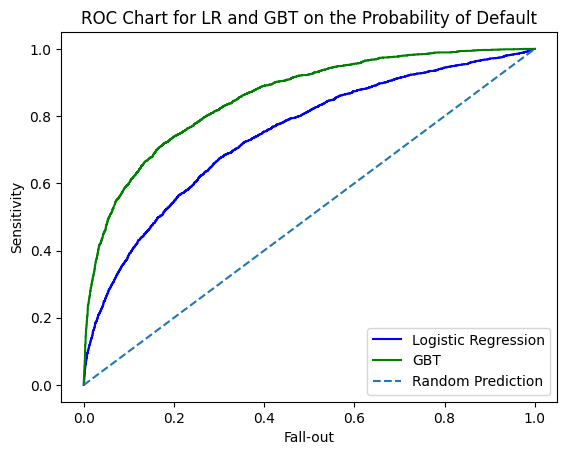

In [24]:
# ROC chart components
clf_logistic_preds = clf_logistic.predict_proba(X_test)[:, 1]
clf_gbt_preds = clf_gbt.predict_proba(X_test)[:, 1]
fallout_lr, sensitivity_lr, thresholds_lr = metrics.roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = metrics.roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [25]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % metrics.roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % metrics.roc_auc_score(y_test, clf_gbt_preds))

Logistic Regression AUC Score: 0.74
Gradient Boosted Tree AUC Score: 0.86


In [26]:
from sklearn.calibration import calibration_curve
y_pred = clf_gbt.predict_proba(X_test)[:,1]
prob_true_gb, prob_pred_gb = calibration_curve(y_test, y_pred, n_bins=10)

# Create predictions of probability for loan status using test data
preds = clf_logistic.predict_proba(X_test)[:,1]
prob_true_lr, prob_pred_lr = calibration_curve(y_test, preds, n_bins=10)

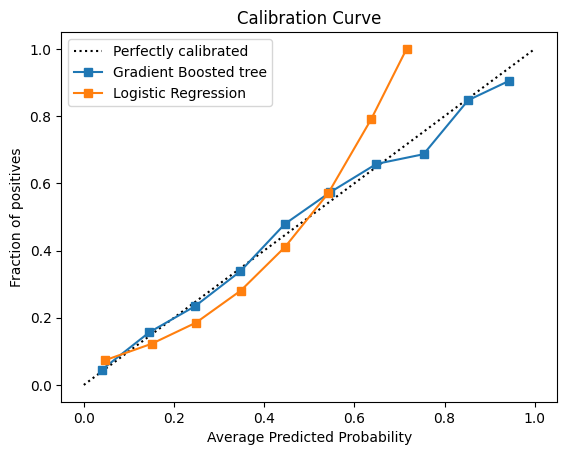

In [27]:
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(prob_pred_gb, prob_true_gb,
         's-', label='%s' % 'Gradient Boosted tree')
plt.plot(prob_pred_lr, prob_true_lr,
         's-', label='%s' % 'Logistic Regression')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [43]:
#Accptance rates quando accettare una richiesta di mutuo?
proba_gbt = clf_gbt.predict_proba(X_test)[:,1]

df_proba_gbt = pd.DataFrame(proba_gbt)

threshold_85 = np.quantile(proba_df_gbt, 0.85)

# Apply acceptance rate threshold
test_pred_df = df_proba_gbt.iloc[:,0].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df.value_counts())

0    10018
1     1768
Name: 0, dtype: int64


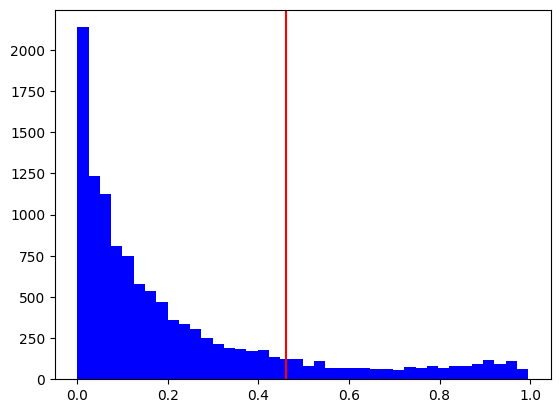

In [44]:
# Plot the predicted probabilities of default
plt.hist(df_proba_gbt.iloc[:,0], color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(df_proba_gbt.iloc[:,0], 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

In [77]:
# Reshape the arrays to have a single column
y_test_1d = y_test.to_numpy().ravel()
proba_gbt_1d = proba_gbt.ravel()
preds_df_gbt_1d = preds_df_gbt.ravel().astype(int)

# Concatenate the arrays horizontally
data = np.hstack((y_test_1d.reshape(-1, 1), proba_gbt_1d.reshape(-1, 1), preds_df_gbt_1d.reshape(-1, 1)))

# Create the data frame
df = pd.DataFrame(data, columns=['True Value', 'Probability pred', 'Predict Value'])


# # Create a subset of only accepted loans
accepted_loans = df[df['Predict Value'] == 0]

# # Calculate the bad rate
print(np.sum(accepted_loans['True Value']) / accepted_loans['True Value'].count())

0.13933222363654166


In [92]:
accept_rates = [1.0,0.95,0.9,0.85,0.8,0.75,0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]
bad_rates = []
thresholds = []

In [93]:
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(df['Probability pred'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(df['Probability pred'], rate).round(3))
    # Reassign the loan_status value using the threshold
    df['pred_loan_status'] = df['Probability pred'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = df[df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['True Value']) / len(accepted_loans['True Value'])).round(3))

    Acceptance Rate  Threshold  Bad Rate
0              1.00      0.996     0.220
1              0.95      0.838     0.185
2              0.90      0.625     0.156
3              0.85      0.460     0.131
4              0.80      0.367     0.114
5              0.75      0.295     0.099
6              0.70      0.243     0.088
7              0.65      0.201     0.080
8              0.60      0.170     0.070
9              0.55      0.143     0.061
10             0.50      0.119     0.050
11             0.45      0.100     0.045
12             0.40      0.081     0.040
13             0.35      0.066     0.032
14             0.30      0.054     0.025
15             0.25      0.041     0.021
16             0.20      0.029     0.018
17             0.15      0.020     0.015
18             0.10      0.013     0.009
19             0.05      0.007     0.006


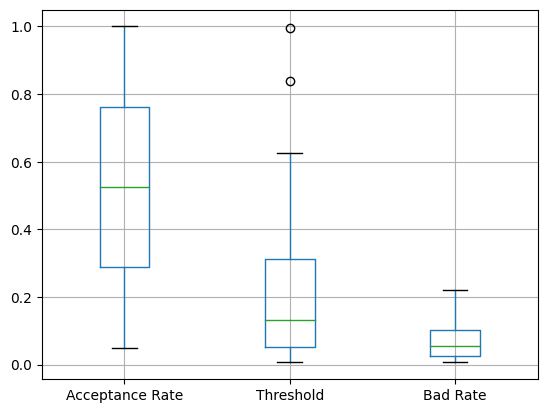

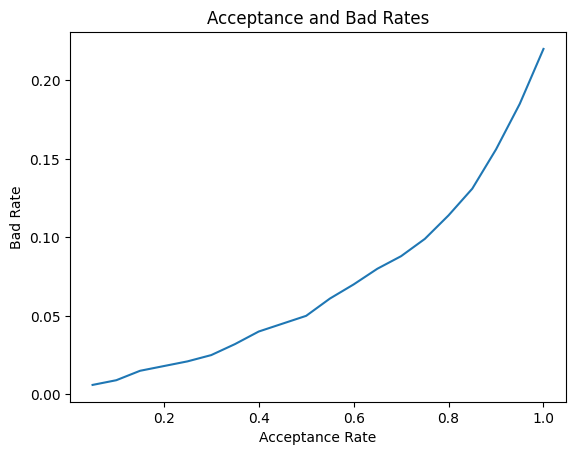

In [99]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

strat_df.boxplot()
plt.show()

# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.show()